In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from trial_class import *
from experiment_class import Experiment
from hd_extension import *

In [2]:
# experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac"
# csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\nac_csvs"
# brain_region = '#15616F'

# NAc: #15616F
# mPFC: #FFAF00

experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc"
csv_base_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc_csvs"
brain_region = '#FFAF00'


In [3]:
# groups csv + experiment data into one variable
experiment = Experiment(experiment_path, csv_base_path)

# batch process the data, removing the specified time segments for subjects
experiment.default_batch_process()

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc\p1-240516-064158\Notes.txt
read from t=0s to t=1547.64s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc\p2-240516-071921\Notes.txt
read from t=0s to t=1556.22s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc\p3-240516-075659\Notes.txt
read from t=0s to t=1538.85s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc\p4-240516-083255\Notes.txt
read from t=0s to t=1773.98s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc\p5-240821-092649\Notes.txt
read from t=0s to t=1326.46s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Hab_Dishab\All\mpfc\p6-240821-103616\Notes.txt
read from t=0s to t=1

In [4]:
bout_definitions = [
    {'prefix': 's1', 'introduced': 's1_Introduced', 'removed': 's1_Removed'},
    {'prefix': 's2', 'introduced': 's2_Introduced', 'removed': 's2_Removed'}
]

experiment.group_extract_manual_annotations(bout_definitions, first_only=False)

Processing behaviors for p1-240516-064158...
Processing behaviors for p2-240516-071921...
Processing behaviors for p3-240516-075659...
Processing behaviors for p4-240516-083255...
Processing behaviors for p5-240821-092649...
Processing behaviors for p6-240821-103616...
Processing behaviors for p7-240821-111323...
Processing behaviors for p8-240821-121933...
Processing behaviors for pp1-250115-080205...
Processing behaviors for pp2-250115-083739...
Processing behaviors for pp3-250115-091306...
Processing behaviors for pp4-250115-094555...
Processing behaviors for pp5-250114-053943...
Processing behaviors for pp6-250114-061037...
Processing behaviors for pp7-250114-070021...
Processing behaviors for pp8-250114-080316...


# Total Investigation Time & Average Bout Duration

Functions from hd_extension:<br>
get_trial_dataframes(experiment)<br>
create_metadata_dataframe(exp_dict, behavior="Investigation")

In [5]:
exp_dict = get_trial_dataframes(experiment)

In [6]:
desired_bouts = ['s1-1', 's1-2', 's1-3', 's1-4', 's1-5', 's2-1']
metadata_df = create_metadata_dataframe(exp_dict, behavior="Investigation", desired_bouts=desired_bouts)

In [7]:
metadata_df.head()

,Subject,Bout,Behavior,Total Investigation Time,Average Bout Duration
0,p1,s1-1,Investigation,53.065,6.633125
1,p1,s1-2,Investigation,12.266,1.752286
2,p1,s1-3,Investigation,54.333,4.939364
3,p1,s1-4,Investigation,27.400,3.044444
4,p1,s1-5,Investigation,23.067,4.613400


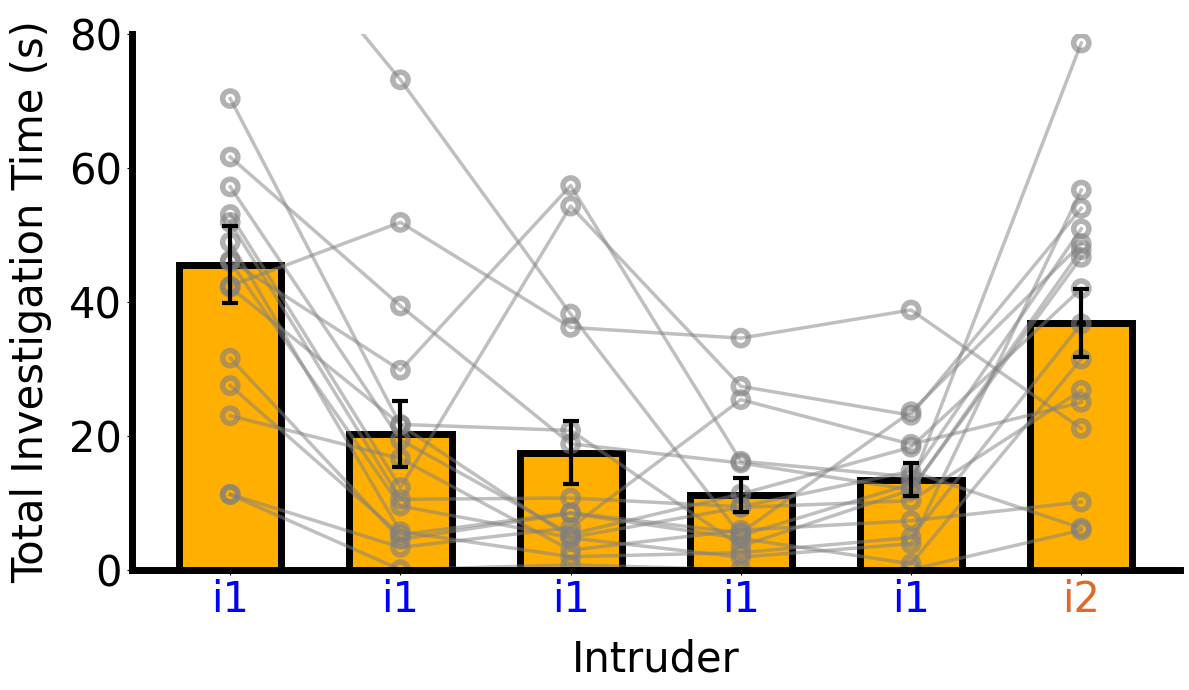

In [8]:
# Total Investigation Time Across Bouts
plot_behavior_times_across_bouts_gray(
    metadata_df=metadata_df,
    y_col="Total Investigation Time",
    behavior="Investigation",
    title=" ",
    xlabel="Intruder",
    ylabel="Total Investigation Time (s)",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(0, 80),
    bar_color=brain_region,
    yticks_increment=20,
    figsize=(12,7),
    pad_inches=0.1,
    save=False,
    save_name=r"Hab_Dishab_Plots\Timing_Plots\NAc_C4_Total_Investigation_Time_Across_Bouts_noN5.png"
)


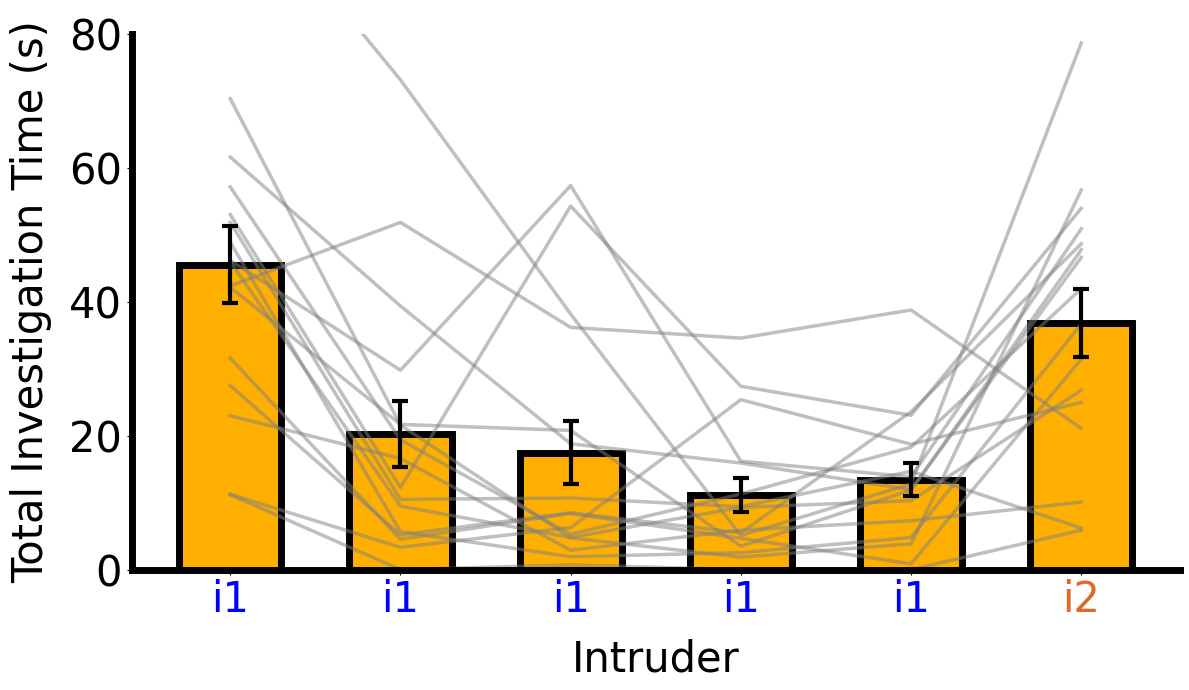

In [9]:
# Total Investigation Time Across Bouts
plot_behavior_times_across_bouts_gray_bars_only(
    metadata_df=metadata_df,
    y_col="Total Investigation Time",
    behavior="Investigation",
    title=" ",
    xlabel="Intruder",
    ylabel="Total Investigation Time (s)",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(0, 80),
    bar_color=brain_region,
    yticks_increment=20,
    figsize=(12,7),
    pad_inches=0.1,
    save=False,
    save_name=r"Hab_Dishab_Plots\Timing_Plots\NAc_C4_Total_Investigation_Time_Across_Bouts_noN5.png"
)


In [10]:
# plot_behavior_times_across_bouts_colored(
#     metadata_df=metadata_df,
#     y_col="Total Investigation Time",
#     behavior="Investigation",
#     title="Investigation Time Across Bouts",
#     xlabel="Intruder",
#     ylabel="Total Investigation Time (s)",
#     custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
#     custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
#     ylim=(0, 60),
#     bar_color=brain_region,
#     yticks_increment=20,
#     figsize=(12,7),
#     pad_inches=0.1,
#     save=False,
#     save_name=r"Hab_Dishab_Plots\Timing_Plots\NAc_C1-C2_Total_Investigation_Time_Across_Bouts.png"
# )

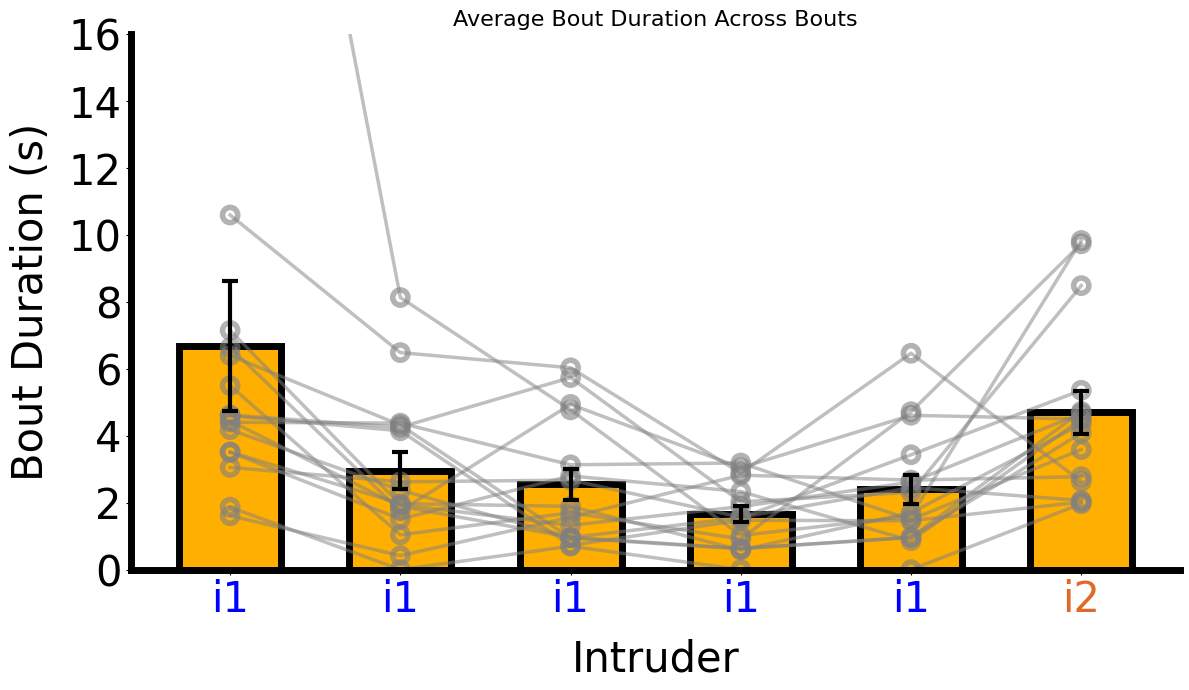

In [11]:
# Average Bout Duration Across Bouts
plot_behavior_times_across_bouts_gray(
    metadata_df=metadata_df,
    y_col="Average Bout Duration",
    behavior="Investigation",
    title="Average Bout Duration Across Bouts",
    xlabel="Intruder",
    ylabel="Bout Duration (s)",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(0, 15),
    bar_color=brain_region,
    yticks_increment=2,
    figsize=(12,7),
    pad_inches=0.1,
    save=False,
    save_name=r"Hab_Dishab_Plots\Timing_Plots\NAc_C3_Average_Bout_Duration_Across_Bouts.png"
)

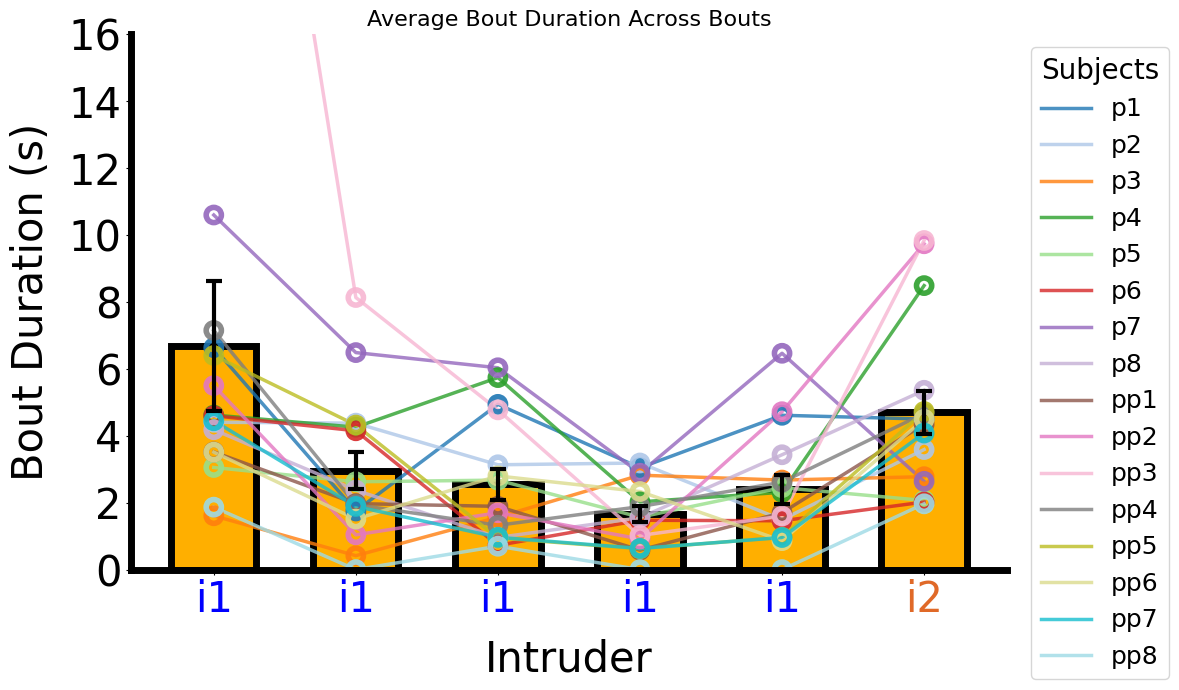

In [12]:
# Average Bout Duration Across Bouts
plot_behavior_times_across_bouts_colored(
    metadata_df=metadata_df,
    y_col="Average Bout Duration",
    behavior="Investigation",
    title="Average Bout Duration Across Bouts",
    xlabel="Intruder",
    ylabel="Bout Duration (s)",
    custom_xtick_labels=["i1", "i1", "i1", "i1", "i1", "i2"],
    custom_xtick_colors=["blue", "blue", "blue", "blue", "blue", "#E06928"],
    ylim=(0, 15),
    bar_color=brain_region,
    yticks_increment=2,
    figsize=(12,7),
    pad_inches=0.1,
    save=False,
    save_name=r"Hab_Dishab_Plots\Timing_Plots\NAc_C3_Average_Bout_Duration_Across_Bouts.png"
)